# Import libraires, data et paramètres

In [280]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import Normalize

In [268]:
# Load the data
data1 = np.loadtxt('P2024_f_eps_Part3.txt')
nat_freq = data1[:, 0]
damping_ratios = data1[:, 1]
damping_ratios_pt2 = np.full(len(damping_ratios), 0.02)

modes = np.loadtxt('P2024_modes_Part3.txt')
modes /= 1000  # passage de mm à m

data3 = np.loadtxt('P2024_frf_Part3_f_ds.txt')
frf_freq = data3[:, 0]
frf_re = data3[:, 1]
frf_im = data3[:, 2]

In [269]:
# Parameters
F0 = 450
wavelength = 0.2
speed_kph = 50

Omega = 2*np.pi*speed_kph/(3.6*wavelength)


def F_Z(t):
    return F0*np.sin(Omega*t)

---

# Partie 1

## Question 1



### Plot de l'excitation harmonique

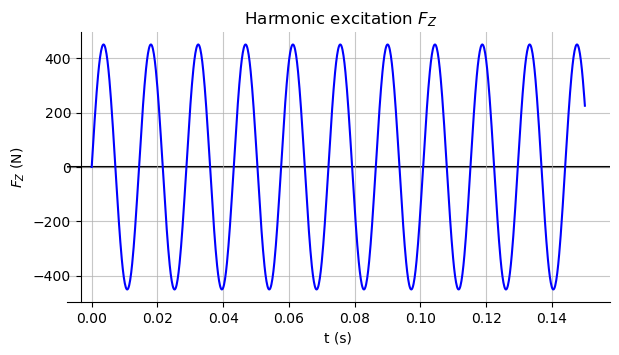

In [270]:
# Plot the harmonic excitation from 0 to 0.15s

t = np.linspace(0, 0.15, 1000)
F = F_Z(t)

fig, ax = plt.subplots(figsize=(7, 4 * 7/8))
ax.plot(t, F, color='blue')
ax.axhline(y=0, color='black', zorder=0)

# Improve axes appearance
ax.spines['top'].set_visible(False)  # Remove top spine
ax.spines['right'].set_visible(False)  # Remove right spine
ax.spines['left'].set_position(('outward', -10))  # Offset left spine
ax.spines['bottom'].set_position(('outward', 0))  # Offset bottom spine

# Axes names
ax.set_xlabel('t (s)')
ax.set_ylabel('$F_Z$ (N)')

# Add grid with transparency
plt.grid(True, alpha=0.7)

# Add a title
plt.title(' Harmonic excitation $F_Z$')

# Show the plot
fig.savefig('Plots/harmonic_excitation.png', dpi=300, bbox_inches='tight')
plt.show()

---

## Question 2

### Calcul de la matrices des FRF en accélération

In [ ]:
def FRF_matrix(freq, part):

    if part == 1:
        damp_r = damping_ratios
    elif part == 2:
        damp_r = damping_ratios_pt2


    H = np.zeros((len(modes), len(modes)), dtype=complex)

    omega = 2*np.pi*freq

    nat_f = 2*np.pi*nat_freq


    for k in range(len(nat_freq)):

        denominator = nat_f[k]**2 - omega**2 + \
            2j * damp_r[k]*omega*nat_f[k]

        H += np.outer(modes[:, k], modes[:, k]) * (-omega**2) / denominator


    return H


def FRF_amplitude(freq, part):
    H = FRF_matrix(freq, part)
    return np.abs(H)



def Bode_amp_seat(freq, part):

    H = FRF_matrix(freq, part)

    amplitude = np.abs(H[11, 0])

    return amplitude



def nyq_real(freq):

    H = FRF_matrix(freq, part=1)

    return np.real(H[11, 0])



def nyq_im(freq):

    H = FRF_matrix(freq, part=1)

    return np.imag(H[11, 0])

### Plot diagrammes de Bode et Nyquist avec la matrice FRF

Text(0, 0.5, 'Amplitude (m/s$^2$/N)')

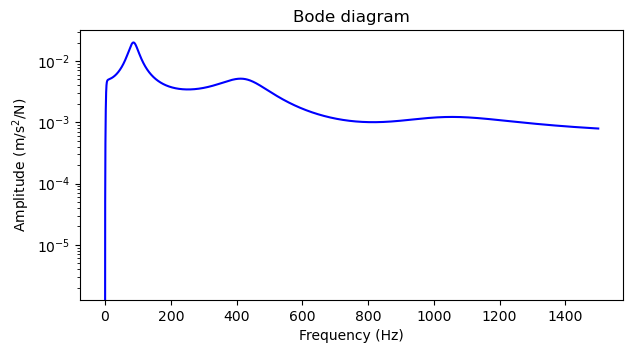

In [272]:
# Bode diagram
frequencies = np.linspace(0, 1500, 20000)
amplitudes = [Bode_amp_seat(f, part=1) for f in frequencies]

fig, ax = plt.subplots(figsize=(7, 4 * 7/8))
ax.semilogy(frequencies, amplitudes, color='blue')
plt.title('Bode diagram')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude (m/s$^2$/N)')

Text(0, 0.5, 'Im (m/s$^2$/N)')

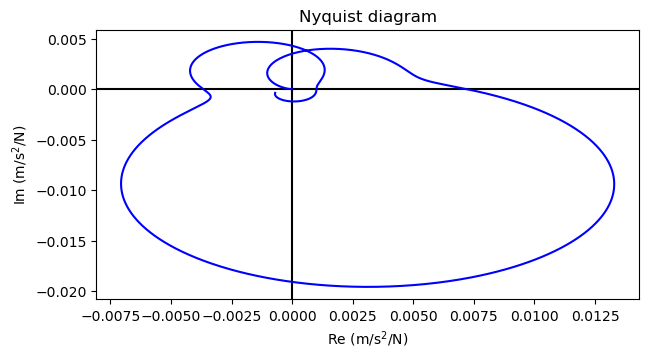

In [273]:
# Nyquist diagram
nyquist_real = [nyq_real(f) for f in frequencies]
nyquist_im = [nyq_im(f) for f in frequencies]

fig, ax = plt.subplots(figsize=(7, 4 * 7/8))
ax.plot(nyquist_real, nyquist_im, color='blue')
plt.title('Nyquist diagram')
ax.axhline(y=0, color='black', zorder=0)
ax.axvline(x=0, color='black', zorder=0)
ax.set_xlabel('Re (m/s$^2$/N)')
ax.set_ylabel('Im (m/s$^2$/N)')

### Bode and Nyquist diagrams from given FRF 

Text(0, 0.5, 'Im (m/s$^2$/N)')

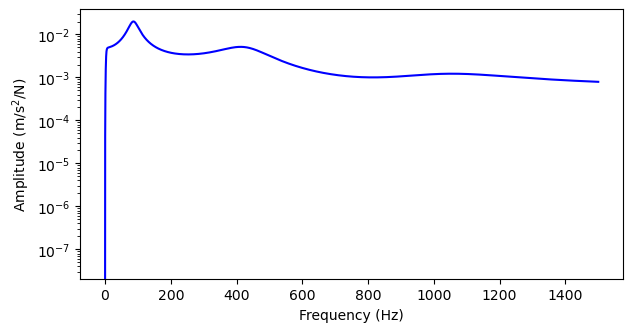

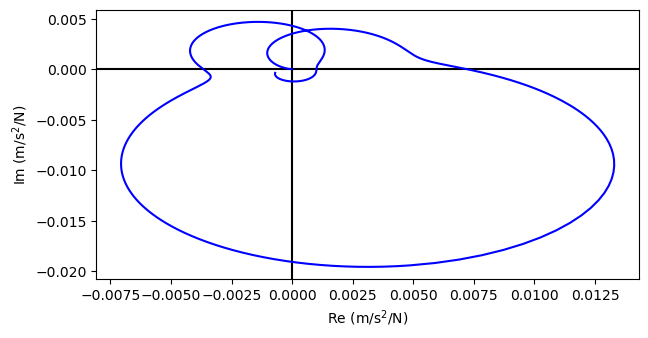

In [ ]:
# Bode Plot of the gven FRF
fig, ax = plt.subplots(figsize=(7, 4 * 7/8))
frf_amplitude = np.abs(frf_re + 1j*frf_im)
ax.semilogy(frf_freq, frf_amplitude, color='blue')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude (m/s$^2$/N)')

# nyquist plot of the given FRF

fig, ax = plt.subplots(figsize=(7, 4 * 7/8))
ax.plot(frf_re, frf_im, color='blue')
ax.axhline(y=0, color='black', zorder=0)
ax.axvline(x=0, color='black', zorder=0)
ax.set_xlabel('Re (m/s$^2$/N)')
ax.set_ylabel('Im (m/s$^2$/N)')

---

## Question 3 


### Amplitude max de la réponse pour chaque point et montrer l'évolution dans un graphe

[9.4 8.7 6.8 5.  5.4 5.4 7.2 8.2 7.6 5.5 2.2 2.  5.9 9.8]
[0.  0.1 0.2 0.3 0.4 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2]


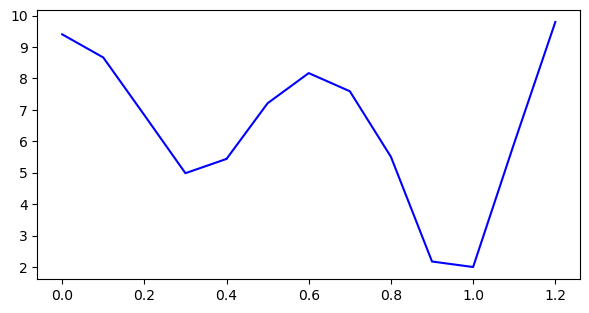

In [275]:
excitation_amp_vector = np.zeros_like(modes[:, 0])
excitation_amp_vector[1] = F0

ampl_vector = np.dot(FRF_amplitude(Omega, part=1), excitation_amp_vector)
print(np.round(ampl_vector, 1))

sensors_pos = np.linspace(0, 1.2, 13)
sensors_pos = np.insert(sensors_pos, 4, 0.4)
print(sensors_pos)

fig, ax = plt.subplots(figsize=(7, 4 * 7/8))
ax.plot(sensors_pos, ampl_vector, color='blue')

### Plot l'évolution de la réponse en accélération au siège du pilote

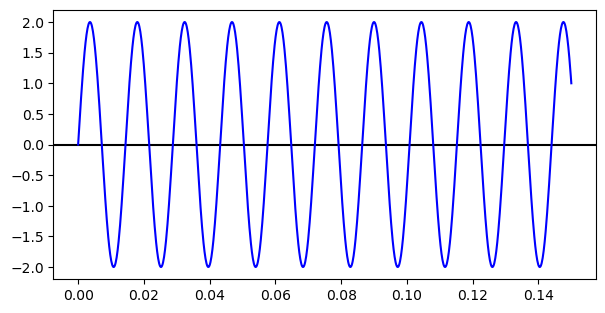

In [276]:
amplitude_driver = ampl_vector[11]
response = amplitude_driver * np.sin(Omega*t)

fig, ax = plt.subplots(figsize=(7, 4 * 7/8))
ax.plot(t, response, color='blue')
ax.axhline(y=0, color='black', zorder=0)

---


# Partie 2

## Question 1

### Fourche bloquée, tous les $\varepsilon$ = 0.02 ; calculer l'amplitude de la réponse du siège pilote à une excitation à la fourche entre 50 et 70 kph

Text(0.5, 1.0, 'Amplitude of the driver seat')

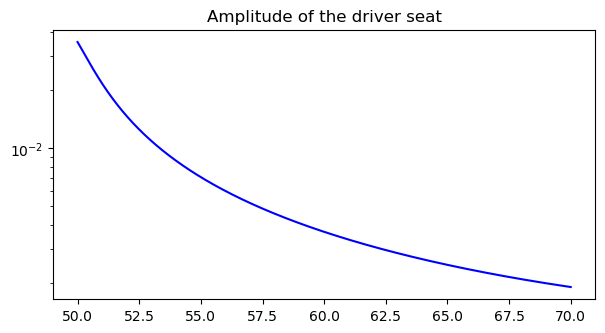

In [277]:
speed_pt2 = np.linspace(50, 70, 5000)
Omega_pt2 = 2*np.pi*speed_pt2/(3.6*wavelength)
amplitude_driver_pt2 = np.zeros_like(speed_pt2)

for i in range(len(speed_pt2)):
    amplitude_driver_pt2[i] = Bode_amp_seat(Omega_pt2[i], part=2)


fig, ax = plt.subplots(figsize=(7, 4 * 7/8))
ax.semilogy(speed_pt2, amplitude_driver_pt2, color='blue')
plt.title('Amplitude of the driver seat')

## Question 2

### Fourche bloquée, regarder quelles fréquences sont accentuées et peuvent etre dangereuses pour le corps humain

Text(0, 0.5, 'Amplitude (m/$s^2$)')

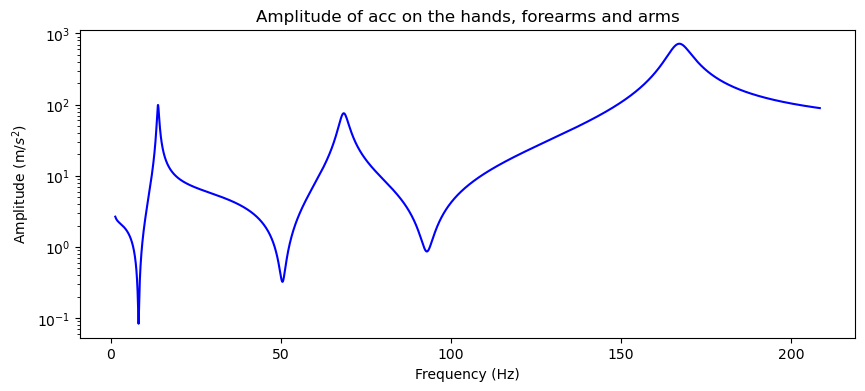

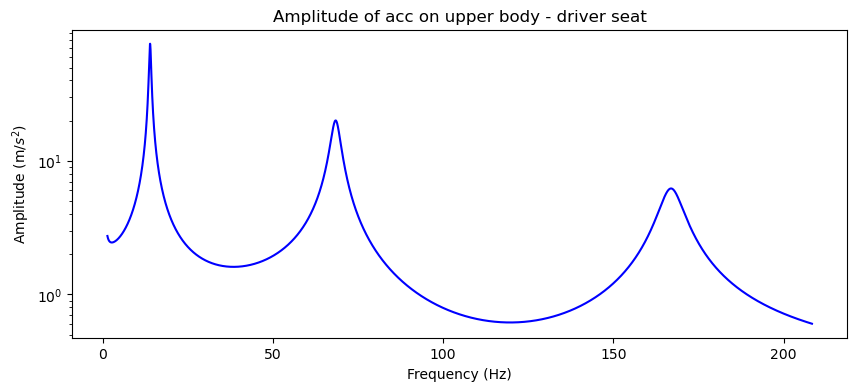

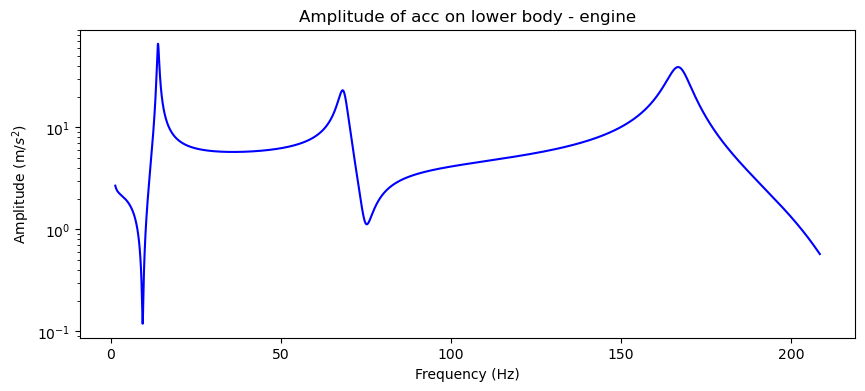

In [278]:
speed_pt2 = np.linspace(1, 150, 5000)
Omega_pt2 = 2*np.pi*speed_pt2/(3.6*wavelength)
freq_pt2 = Omega_pt2/(2*np.pi)

amplitude_sensors_pt2 = np.zeros((len(speed_pt2), len(modes), len(modes)))
for i in range(len(speed_pt2)):
    amplitude_sensors_pt2[i] = FRF_amplitude(Omega_pt2[i], part=2) * F0


# Hands, forearms, arms :
ampl_hands = amplitude_sensors_pt2[:, 0, 0]

fig, ax = plt.subplots(figsize=(10, 4))
ax.semilogy(freq_pt2, ampl_hands, color='blue')
ax.set_title('Amplitude of acc on the hands, forearms and arms')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude (m/$s^2$)')

# Upper body ( head,neck, torso, lumbar spine, hips, ):
ampl_head = amplitude_sensors_pt2[:, 11, 0]

fig, ax = plt.subplots(figsize=(10, 4))
ax.semilogy(freq_pt2, ampl_head, color='blue')
ax.set_title('Amplitude of acc on upper body - driver seat')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude (m/$s^2$)')

# Lower body (feet, elbows):
ampl_feet = amplitude_sensors_pt2[:, 5, 0]

fig, ax = plt.subplots(figsize=(10, 4))
ax.semilogy(freq_pt2, ampl_feet, color='blue')
ax.set_title('Amplitude of acc on lower body - engine')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude (m/$s^2$)')

<h> Les fréquences de résonance sont identiques partout sur la moto.
Les amplitudes sont par contre différentes pour différents endroits, analyser par rapport aux parties du corps et ce qu'elles touchent sur la moto </h>

---